In [1]:
import pyspark as ps
import random
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter


In [2]:
plt.style.use('ggplot')

font = {'family': 'DejaVu Sans',
        'weight': 'normal',
        'size': 16}

matplotlib.rc('font', **font)

In [3]:
ROOT_DIR=os.path.split(os.path.realpath(''))[0]
SRC_DIR = os.path.join(ROOT_DIR,'src')
IMAGES_DIR = os.path.join(ROOT_DIR,'imgs')
sys.path.append(SRC_DIR)
from tom_func import *

In [4]:
sys.path

['/home/jovyan/work/Documents/Galvanize/repos/recommender-case-study/notebooks',
 '/usr/local/spark/python',
 '/usr/local/spark/python/lib/py4j-0.10.7-src.zip',
 '/opt/conda/lib/python37.zip',
 '/opt/conda/lib/python3.7',
 '/opt/conda/lib/python3.7/lib-dynload',
 '',
 '/opt/conda/lib/python3.7/site-packages',
 '/opt/conda/lib/python3.7/site-packages/IPython/extensions',
 '/home/jovyan/.ipython',
 '/home/jovyan/work/Documents/Galvanize/repos/recommender-case-study/src']

In [5]:
df = pd.read_csv('../data/movies/ratings.csv')

In [6]:
df_genres = pd.read_csv('../data/movies/movies.csv')

In [7]:
df_new = create_vectorized_genre_df(df,df_genres)

In [8]:
genre_list_r,avg_rating = avg_genre_rating(df_new)

In [9]:
g_sort=np.argsort(avg_rating)[::-1]

In [10]:
genre_list_r=[genre_list_r[idx] for idx in g_sort]
avg_rating=[avg_rating[idx] for idx in g_sort]

In [11]:
genre_list_c,avg_count = avg_genre_count(df_new)

In [12]:
g_sort=np.argsort(avg_count)[::-1]

In [13]:
genre_list_c=[genre_list_c[idx] for idx in g_sort]
avg_count=[avg_count[idx] for idx in g_sort]

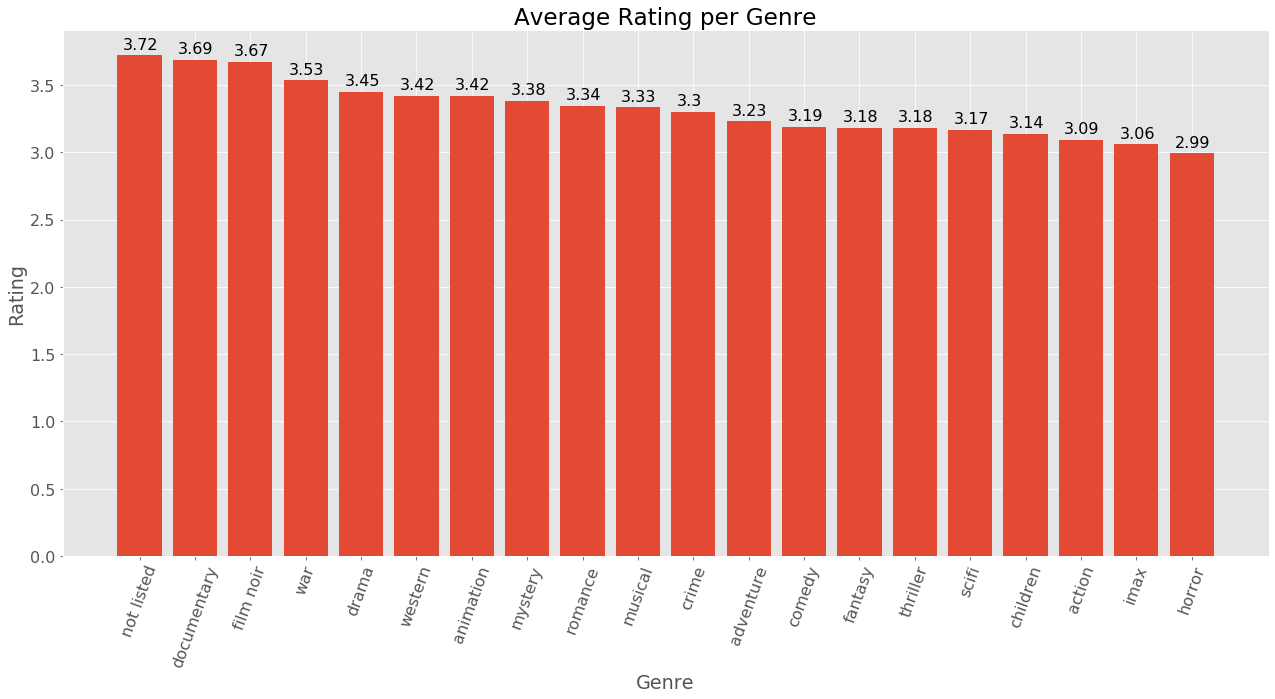

In [18]:
f, ax = plt.subplots(figsize=(18,10)) 
plt.bar(genre_list_r,avg_rating)
locs,_ =plt.xticks(rotation=70)
plt.title('Average Rating per Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Rating')
for i in range(len(genre_list_r)):
    plt.text(x = locs[i]-0.3 , y = avg_rating[i]+.05, s = round(avg_rating[i],2), size = 16)
plt.tight_layout()
plt.savefig(os.path.join(IMAGES_DIR,'avg_rating_genre.jpg'))

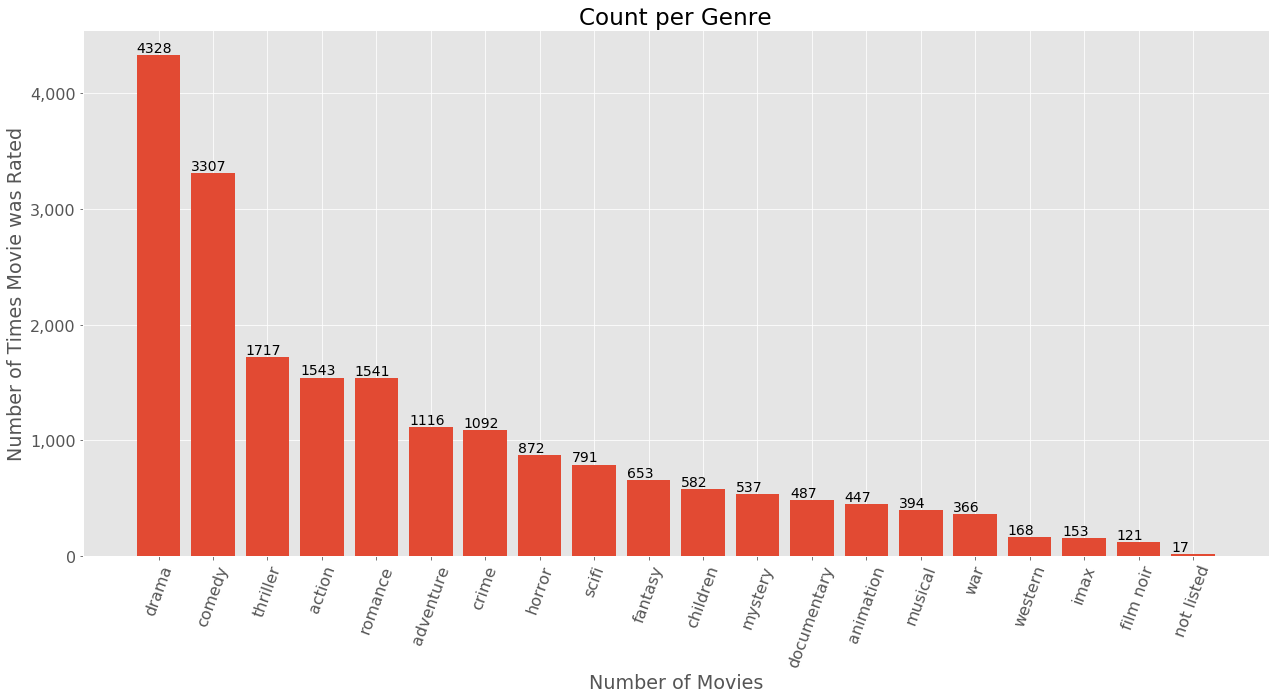

In [19]:
f, ax = plt.subplots(figsize=(18,10)) 
ax.bar(genre_list_c,avg_count)
locs,_ =plt.xticks(rotation=70)
ax.set_title('Count per Genre')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Number of Times Movie was Rated')
for i in range(len(genre_list_c)):
    plt.text(x = locs[i]-0.4 , y = avg_count[i]+25, s = avg_count[i], size = 14)
plt.tight_layout()
plt.savefig(os.path.join(IMAGES_DIR,'avg_count_genre.jpg'))

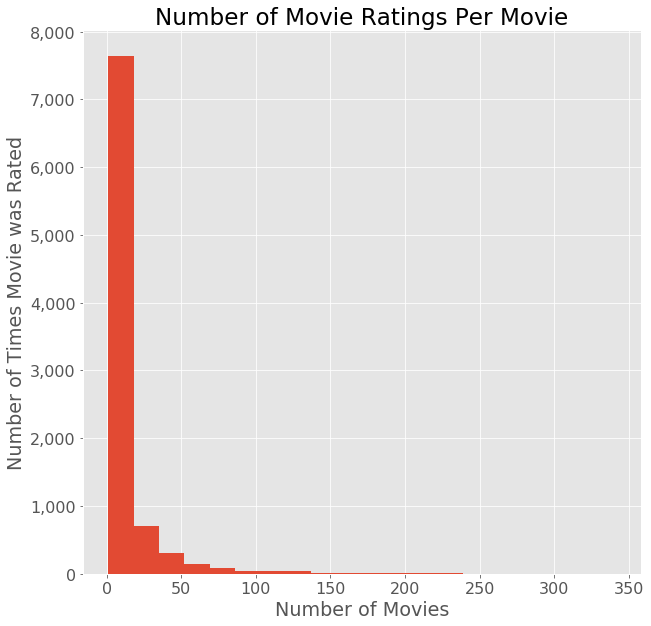

In [16]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.hist(df.groupby('movieId')['rating'].count(),bins=20)
ax.set_title('Number of Movie Ratings Per Movie')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Number of Times Movie was Rated')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
plt.savefig(os.path.join(IMAGES_DIR,'movie_ratings_hist.jpg'))

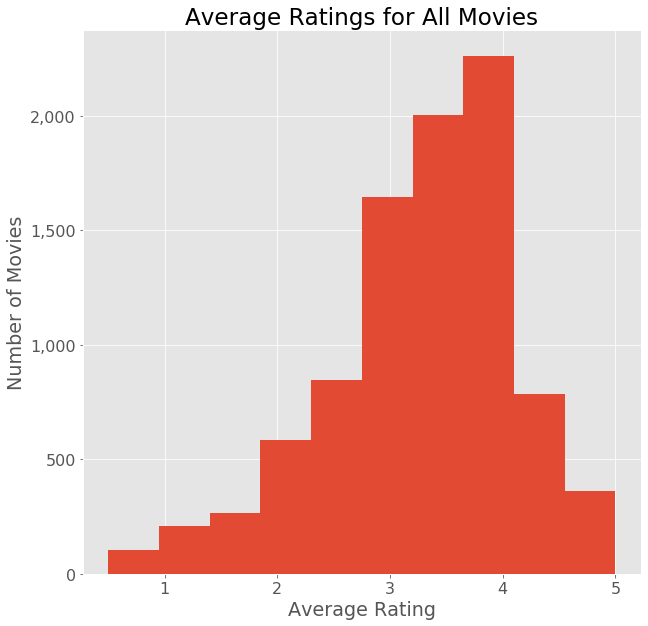

In [17]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.hist(df.groupby('movieId')['rating'].mean(),10)
ax.set_title('Average Ratings for All Movies')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
ax.set_xlabel('Average Rating')
ax.set_ylabel('Number of Movies')
plt.savefig(os.path.join(IMAGES_DIR,'movie_ratings_hist_mean_log.jpg'))